# 실무 조교와 함께 30분 GeoPandas

# Introduction to geospatial vector data in Python

https://www.youtube.com/watch?v=uqnA06fqhqk

출처 : GeoPandas: easy, fast and scalable geospatial analysis in Python 

In [319]:
# environment 준비

import pandas as pd
import numpy as np
pd.options.display.max_rows = 10

import geopandas as gpd
import geopandas
from shapely.geometry import Point, LineString, Polygon, mapping

import matplotlib.pyplot as plt

%matplotlib inline

In [320]:
#한글 세팅
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

# Geo 도형 그리기 연습

In [321]:
point = Point(1, 1)

In [322]:
point = geopandas.GeoSeries([point])

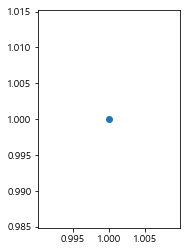

In [323]:
point.plot()

In [324]:
line = LineString([(0, 0), (1, 2), (3, 2)])

In [325]:
line = geopandas.GeoSeries([line])

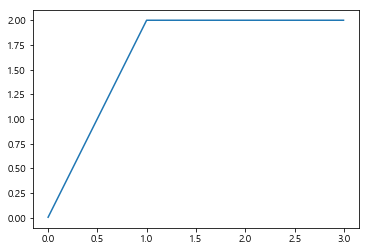

In [326]:
line.plot()

In [327]:
polygon = Polygon([(10, 1), (11, 4), (8, 5), (5, 3), (6, 1)])

In [328]:
polygon = geopandas.GeoSeries([polygon])

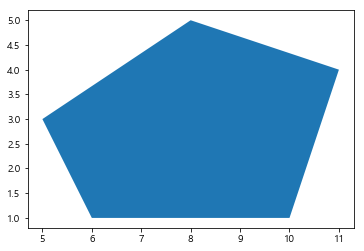

In [329]:
polygon.plot()

In [330]:
point = Point(3, 10)
line = LineString([(2, 2), (2, 5), (5, 8), (8, 7), (10, 9)])
polygon = Polygon([(10, 1), (11, 4), (8, 5), (5, 3), (6, 1)])

In [331]:
s = geopandas.GeoSeries([point, line, polygon])

In [332]:
all_points = geopandas.GeoSeries([point] + list(map(Point, line.coords)) + list(map(Point, polygon.exterior.coords)))

### 그리고 파일로 저장하기

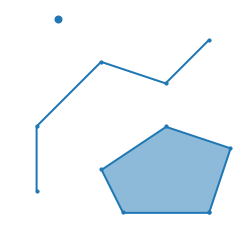

In [333]:
fig, ax = plt.subplots()
s.plot(ax=ax, linewidth=2, edgecolor='C0', facecolor=matplotlib.colors.to_rgba('C0', alpha=0.5))
all_points.plot(ax=ax, markersize=10, color='C0')
ax.set_axis_off()
fig.savefig('simple_features.svg', bbox_inches='tight')

# Read and write GIS file formats

#### 파리 전기자전거역 위치 지도 다운받기
https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/information/

파리시 opendata사이트링크 -> Export -> GeoJSON 다운 -> 30Min_GeoPandas.IPYNB 파일이 있는 폴더에 저장

In [334]:
stations = geopandas.read_file("velib-emplacement-des-stations.geojson")

In [335]:
stations.head()

,capacity,name,lon,station_id,lat,geometry
0,70,Université Paris Dauphine,2.274866,76199110,48.870708,POINT (2.27486561984 48.87070784)
1,16,Les Planètes,2.458085,990000217,48.809985,POINT (2.45808530599 48.8099849921)
2,23,Square du Carrefour de l'Insurrection,2.291113,129136818,48.820865,POINT (2.29111343622 48.8208645598)
3,47,Pajol - Riquet,2.362853,39256416,48.889600,POINT (2.36285347492 48.8896002813)
4,43,Place Etienne Pernet,2.292182,101748685,48.842435,POINT (2.29218196124 48.8424345713)


## GeoDataFrame and GeoSeries 파일 구조

-'GeoDataFrame'은 기하학적인 DataFrame, geometry 속성은 GeoSeries를 반환

-`GeoSeries`는 기하학적인 Series이며, 기하학 객체 (점, 선 문자열, 다각형 등) 있음

In [336]:
type(stations)
#stations.geometry

geopandas.geodataframe.GeoDataFrame

In [337]:
type(stations.geometry)

geopandas.geoseries.GeoSeries

In [338]:
type(stations.geometry[0])

shapely.geometry.point.Point

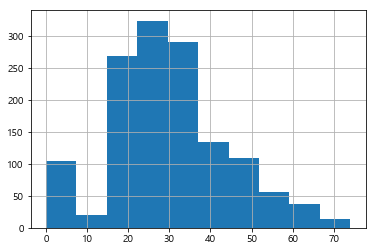

In [339]:
stations['capacity'].hist()

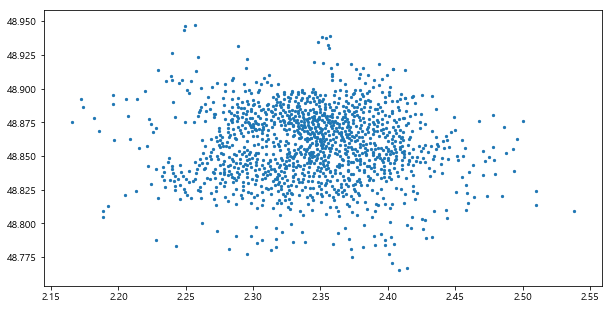

In [340]:
#stations.plot(figsize=(10, 10))
stations.plot(markersize=5, figsize=(10, 10))

#### 파이 행정구역 지도
https://opendata.paris.fr/explore/dataset/quartier_paris/export/?location=12,48.85889,2.34692&basemap=jawg.streets

파리시 opendata사이트링크 -> Export -> GeoJSON 다운 -> 30Min_GeoPandas.IPYNB 파일이 있는 폴더에 저장

In [341]:

quartiers = geopandas.read_file("quartier_paris.geojson")

In [342]:
quartiers.head()

,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry
0,750000010,2139.625388,50,2139.535591,10,271750.323937,750000003,7510302,Enfants-Rouges,3,"POLYGON ((2.367101341254551 48.86162755885409,..."
1,750000016,3283.163371,56,3282.999717,16,378252.153674,750000004,7510404,Notre-Dame,4,"POLYGON ((2.361313701339139 48.84858030437791,..."
2,750000018,4052.729521,58,4052.473226,18,798389.398463,750000005,7510502,Jardin-des-Plantes,5,"POLYGON ((2.364561460891576 48.84365746114398,..."
3,750000025,3827.253353,7,3827.053421,25,826559.436780,750000007,7510701,Saint-Thomas-d'Aquin,7,"POLYGON ((2.322133508640103 48.84924973446431,..."
4,750000035,2786.541926,17,2786.448978,35,417335.080621,750000009,7510903,Faubourg-Montmartre,9,"POLYGON ((2.340255299125085 48.87660144727086,..."


## spatial predicates and operations

In [343]:
quartiers.geometry.area

0     0.000033
1     0.000046
2     0.000098
3     0.000101
4     0.000051
        ...   
75    0.000225
76    0.000099
77    0.000782
78    0.000203
79    0.000134
Length: 80, dtype: float64

### 특정 지점에서 모든 자전거 역까지의 접근거리를 계산
자전거역 접근성 수준알기 위한 것임

1) Notre Dame 을 지역화하기 위해`geopy '를 사용

In [344]:
from geopy.geocoders import Nominatim

In [345]:
geolocator = Nominatim()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


In [346]:
location = geolocator.geocode("Notre Dame Paris")

In [347]:
notre_dame = Point(location.longitude, location.latitude)

In [348]:
print(notre_dame)

POINT (2.3500501225 48.85293705)


In [349]:
notre_dame = Point(2.35005149954546, 48.85293695)

2) Notre Dame 까지 거리 계산

In [350]:
stations.geometry.distance(notre_dame)

0       0.077257
1       0.116259
2       0.067099
3       0.038834
4       0.058815
          ...   
1353    0.070706
1354    0.055674
1355    0.113314
1356    0.047473
1357    0.127960
Length: 1358, dtype: float64

3) Notre Dame이 위치한 quartier 확인

In [351]:
quartiers.contains(notre_dame)

0     False
1      True
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

In [352]:
quartiers[quartiers.contains(notre_dame)]

,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry
1,750000016,3283.163371,56,3282.999717,16,378252.153674,750000004,7510404,Notre-Dame,4,"POLYGON ((2.361313701339139 48.84858030437791,..."


In [353]:
quartiers.head()

,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry
0,750000010,2139.625388,50,2139.535591,10,271750.323937,750000003,7510302,Enfants-Rouges,3,"POLYGON ((2.367101341254551 48.86162755885409,..."
1,750000016,3283.163371,56,3282.999717,16,378252.153674,750000004,7510404,Notre-Dame,4,"POLYGON ((2.361313701339139 48.84858030437791,..."
2,750000018,4052.729521,58,4052.473226,18,798389.398463,750000005,7510502,Jardin-des-Plantes,5,"POLYGON ((2.364561460891576 48.84365746114398,..."
3,750000025,3827.253353,7,3827.053421,25,826559.436780,750000007,7510701,Saint-Thomas-d'Aquin,7,"POLYGON ((2.322133508640103 48.84924973446431,..."
4,750000035,2786.541926,17,2786.448978,35,417335.080621,750000009,7510903,Faubourg-Montmartre,9,"POLYGON ((2.340255299125085 48.87660144727086,..."


## Visualize your geospatial data

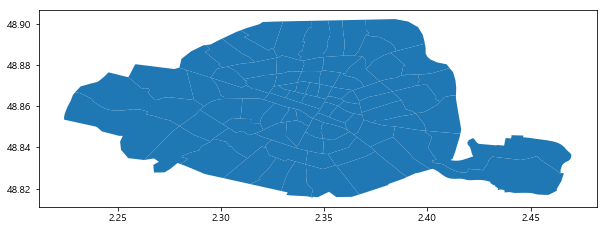

In [354]:
quartiers.plot(figsize=(10, 10))

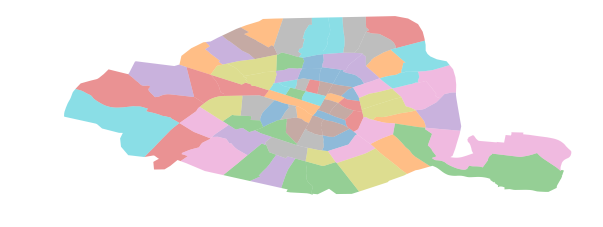

In [355]:
ax = quartiers.plot(figsize=(10, 10), cmap='tab10', alpha=0.5)
ax.set_axis_off()

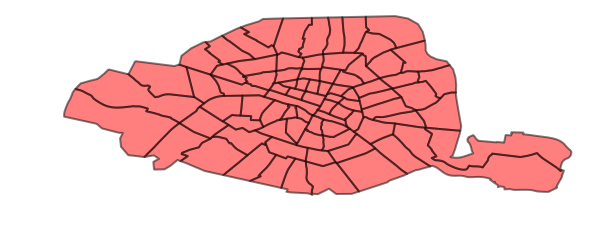

In [356]:
ax = quartiers.plot(figsize=(10, 10), edgecolor='k', facecolor='r', alpha=0.5, linewidth=2)
ax.set_axis_off()

위의 그림들에 거리 네트워크를 추가한다. 
osmnx 패키지를 사용하여 Paris의 openstreetmap 네트워크를 다운로드하고 shapefile로 저장

In [357]:
# 설치, 아나콘다 프롬프트에서 (base) C:\Anaconda3>conda install -c conda-forge osmnx
import osmnx as ox
G = ox.graph_from_place('Paris, France', network_type='drive')
ox.save_graph_shapefile(G, 'openstreetmap_paris', folder='.')

In [358]:
streets = geopandas.read_file("openstreetmap_paris/edges/")

In [359]:
streets.head()

,access,area,bridge,from,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,to,tunnel,width,geometry
0,None,None,None,148942879,residential,None,0,None,35.57,30,Rue Raoul Dufy,False,573814820,None,None,5509971973,None,None,"LINESTRING (2.3911672 48.8651432, 2.3911301 48..."
1,None,None,None,166297606,primary,circular,0,None,15.521,None,Avenue de la Porte d'Italie,True,85730575,None,None,343686657,None,None,"LINESTRING (2.3600914 48.8164112, 2.3600757 48..."
2,None,None,None,166297606,trunk_link,None,0,None,307.014,None,None,True,"[8059024, 362885203, 231974351]",None,None,25240349,None,None,"LINESTRING (2.3600914 48.8164112, 2.3599765 48..."
3,None,None,None,166300778,primary,circular,0,None,32.809,50,Avenue de la Porte d'Italie,True,85730573,None,None,166297606,None,None,"LINESTRING (2.3605333 48.8164111, 2.3602905 48..."
4,None,None,None,644165,primary,None,0,None,43.283,30,Avenue de la Porte d'Italie,True,16289233,None,None,166297606,None,None,"LINESTRING (2.3601995 48.8167939, 2.3601819 48..."


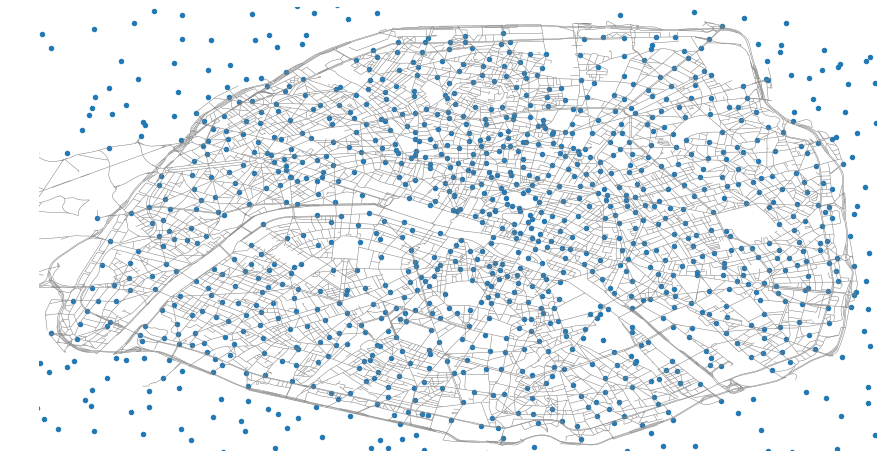

In [360]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15, 10))
stations.plot(ax=ax, markersize=20)
ax.set(xlim=(2.25, 2.42), ylim=(48.815, 48.905));
ax.set_axis_off()

### Color the plot based on values 특정컬럼 값 표시

column` 키워드를 지정함으로써, 그 칼럼의 값을 기반으로 기하 도형을 색칠 할 수 있다

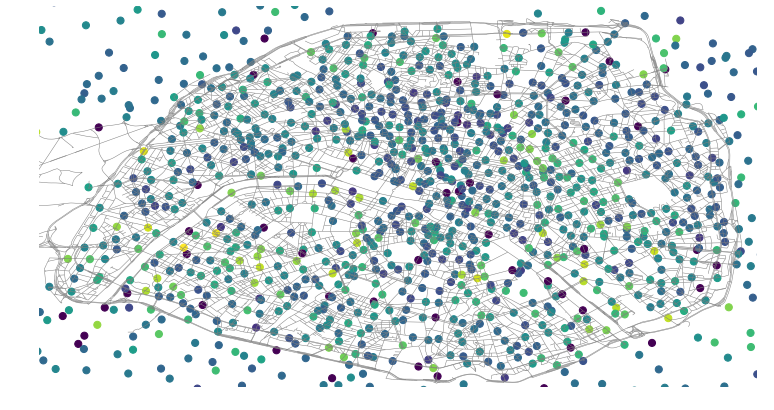

In [361]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15, 7))
stations.plot(ax=ax, column='capacity', markersize=50)#, legend=True)
ax.set(xlim=(2.25, 2.42), ylim=(48.815, 48.905));
ax.set_axis_off()

또는 카테고리 값에 따라 도형 표시

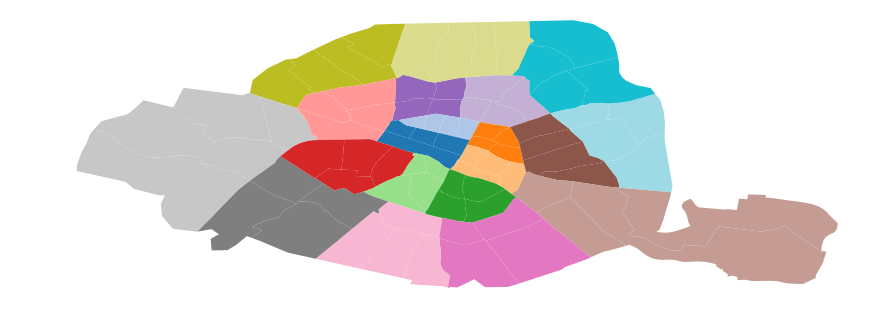

In [362]:
ax = quartiers.plot(column='n_sq_ar', categorical=True, cmap='tab20', figsize=(15, 8))
ax.set_axis_off()

#### GeoJson 으로 입력, 파리시 도로 및 보도망 지도 직접 다운 
https://opendata.paris.fr/explore/dataset/trottoirs_des_rues_de_paris/export/

파일용량이 커서 다운받고 Plot하는 시간이 많이 소요됨
파리시 opendata사이트링크 -> Export -> GeoJSON 다운 -> 30Min_GeoPandas.IPYNB 파일이 있는 폴더에 저장

In [363]:
# (참고)교통혼잡지역 https://opendata.paris.fr/explore/dataset/chantiers-perturbants/export/
#streets = geopandas.read_file("chantiers-perturbants.geojson")

In [364]:
 
#streets = geopandas.read_file("trottoirs_des_rues_de_paris.geojson") 

In [365]:
#ax = streets.plot(linewidth=0.5, color='grey', figsize=(15, 10))
#stations.plot(ax=ax, markersize=20)
#ax.set(xlim=(2.25, 2.42), ylim=(48.815, 48.905));
#ax.set_axis_off()

In [366]:
#ax = quartiers.plot(column='n_sq_ar', categorical=True, cmap='tab20', figsize=(15, 8))
#ax.set_axis_off()

## Spatial joins

GeoPandas은 공간 결합 및 오버레이 (sjoin 및 overlay) 기능이 있음

각 자전거 스테이션이 위치한 행정구역 쿼터를 결정하기 위해 공간 조인을 수행한다

In [367]:
stations = geopandas.sjoin(stations, quartiers[['l_qu', 'geometry']].copy(), op='within')

In [368]:
stations.head()

,capacity,name,lon,station_id,lat,geometry,index_right,l_qu
0,70,Université Paris Dauphine,2.274866,76199110,48.870708,POINT (2.27486561984 48.87070784),38,Porte-Dauphine
54,0,Mahatma Gandhi,2.264205,221038698,48.876356,POINT (2.264205 48.876356),38,Porte-Dauphine
67,29,André Maurois - Joseph et Marie Hackin,2.278959,457834134,48.877898,POINT (2.2789591 48.8778983),38,Porte-Dauphine
88,41,Victor Hugo - La Pompe,2.281463,38327,48.867952,POINT (2.28146318346 48.8679522247),38,Porte-Dauphine
191,31,Crevaux - Bugeaud,2.281149,15462861,48.870809,POINT (2.28114900769 48.8708094287),38,Porte-Dauphine


In [369]:
counts = stations.groupby('l_qu').size()

In [370]:
quartiers = quartiers.merge(counts.reset_index(name='number_bike_stations'))

In [371]:
quartiers.head()

,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry,number_bike_stations
0,750000010,2139.625388,50,2139.535591,10,271750.323937,750000003,7510302,Enfants-Rouges,3,"POLYGON ((2.367101341254551 48.86162755885409,...",3
1,750000016,3283.163371,56,3282.999717,16,378252.153674,750000004,7510404,Notre-Dame,4,"POLYGON ((2.361313701339139 48.84858030437791,...",4
2,750000018,4052.729521,58,4052.473226,18,798389.398463,750000005,7510502,Jardin-des-Plantes,5,"POLYGON ((2.364561460891576 48.84365746114398,...",9
3,750000025,3827.253353,7,3827.053421,25,826559.436780,750000007,7510701,Saint-Thomas-d'Aquin,7,"POLYGON ((2.322133508640103 48.84924973446431,...",7
4,750000035,2786.541926,17,2786.448978,35,417335.080621,750000009,7510903,Faubourg-Montmartre,9,"POLYGON ((2.340255299125085 48.87660144727086,...",8


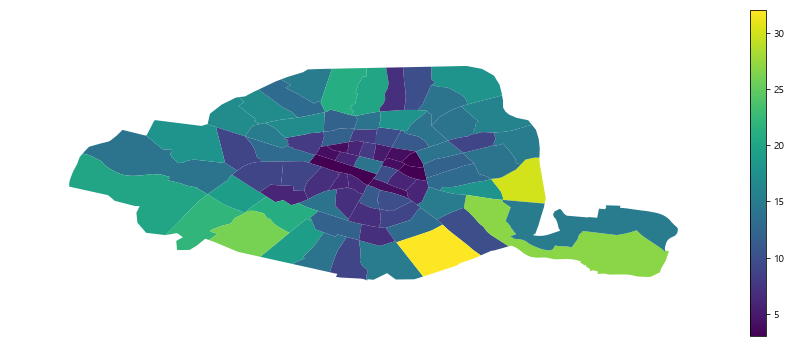

In [372]:
ax = quartiers.plot(column='number_bike_stations', figsize=(15, 6), legend=True)
ax.set_axis_off()

In [373]:
quartiers['number_bike_stations_relative'] = quartiers['number_bike_stations'] / quartiers.geometry.area

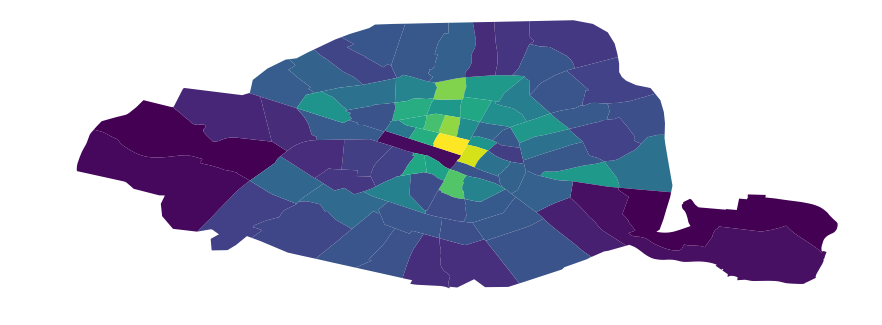

In [374]:
ax = quartiers.plot(column='number_bike_stations_relative', figsize=(15, 6))
ax.set_axis_off()

## Coordinate reference systems 좌표 변환

GeoDataFrame 또는 GeoSeries에는 좌표체계 속성 .crs 이 있다.

In [375]:
stations.crs

{'init': 'epsg:4326'}

In [376]:
stations.geometry.head(3)

0     POINT (2.27486561984 48.87070784)
54           POINT (2.264205 48.876356)
67         POINT (2.2789591 48.8778983)
Name: geometry, dtype: object

`to_crs` 함수를 사용하여 다른 좌표계로 변환이 가능함

예를 들어 미터좌표를 UTM 31U 체계로 변환 (http://epsg.io/32631) 

In [377]:
stations2 = stations.to_crs(epsg=32631)
# or 
# stations.to_crs("+proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=m +no_defs ")

In [378]:
stations2.geometry.head(3)

0     POINT (446824.8834367119 5413336.608308421)
54    POINT (446049.2048513305 5413971.974198194)
67    POINT (447132.6393570931 5414133.058029892)
Name: geometry, dtype: object

In [379]:
quartiers2 = quartiers.to_crs(epsg=32631)

In [380]:
(quartiers2.geometry.area / 1000**2)

0     0.271603
1     0.378054
2     0.797983
3     0.826127
4     0.417104
        ...   
75    1.834668
76    0.806119
77    6.380679
78    1.652756
79    1.088591
Length: 80, dtype: float64

# 서울시, Importing geospatial data
좌표가있는 DataFrame에서 GeoDataFrame 만들기
---------------------------------------------------------

이 예제는 시작시``GeoDataFrame``을 만드는 법을 보여줍니다.
a * 정규 *``DataFrame``는 좌표가 WKT입니다.

지형 공간 데이터는 ESRI shapefiles, GeoJSON 파일, geopackage 파일, PostGIS (PostgreSQL) 데이터베이스 등과 같은 특정 GIS 파일 형식 또는 데이터 저장소에서 종종 사용할 수 있습니다.

우리는 GeoPandas 라이브러리를 사용하여`geopandas.read_file` 함수를 사용하여 많은 GIS 파일 형식 (GDAL / OGR에 대한 인터페이스 인`fiona` 라이브러리에 의존)을 읽을 수 있습니다.

In [381]:
# 서울시 도서관 현황
seoul = pd.read_csv('S_Library.csv',  encoding='utf-8')
#seoul.head() 데이터프레임 
#seoul = geopandas.read_file("zip://./data/seoul.zip")로 입력 가능합니다

In [382]:
seoul.head()

,도서관 일련번호,도서관명,구 코드,구명,주소,전화번호,팩스번호,홈페이지 URL,운영시간,정기 휴관일,도서관 구분명,위도,경도,담당자이메일,도서관 소개,설립연도,회원가입요건,대출안내,교통편,층별 설명
0,1571,LH 강남3단지 작은도서관,8,강남구,서울특별시 강남구 자곡로3길 22,02-459-8700,NaN,NaN,NaN,매주 화요일목요일,작은도서관,37.471058,127.090973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1848,休+밤토리SH작은도서관,8,강남구,서울특별시 강남구 밤고개로26길 50(율현동 강남한신휴플러스6단지),NaN,NaN,NaN,NaN,-,작은도서관,37.468065,127.105463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1935,강남구립못골도서관,8,강남구,서울시 강남구 자곡로 116,02-459-5522,NaN,http://mglib.gangnam.go.kr,NaN,둘째 넷째 화요일,공공도서관,37.509518,127.032150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1066,강남역삼푸른솔도서관,8,강남구,서울특별시 강남구 테헤란로8길 36. 4층,02-2051-1178,02-2051-1178,http://ysplib.gangnam.go.kr/,NaN,24 주 화요일 및 법정 공휴일,공공도서관,37.496460,127.032016,jsh43073@naver.com,NaN,20090612.0,서울시민 서울소재 학교 재학생 서울 소재 직장 재직자 \r,2권 이내\r 기본 14일 연기 7일[연기는 반납예정일 1주일전 부터 가능 예약자가...,2호선 강남역 1번출구에서 역삼역 방향으로 직진. \r 국기원 사거리에서 역삼초등학...,NaN
4,1845,강남한신휴플러스8단지 작은도서관,8,강남구,서울특별시 강남구 밤고개로27길 20(율현동 강남한신휴플러스8단지),NaN,NaN,NaN,NaN,-,작은도서관,37.468099,127.105431,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Point Geometry로 경도 longitudes 및 위도 latitudes 추가
=============================

먼저, 서울 등 도시와 각각의 도시를 포함하는``DataFrame``을 생각해 봅시다.
경도와 위도를 표시.

우리는 GeoPandas 라이브러리를 사용하여 지형 공간 데이터를 읽었습니다. 그러면 GeoDataFrame이 반환되었습니다

In [383]:
#1차 방법
seoul['geometry']=seoul.apply(lambda z: Point(z.위도, z.경도), axis=1)
Pointsseoul = gpd.GeoDataFrame(seoul)

#2차 방법
#GeoDataFrame``은``shapely`` 객체를 필요로하므로 새로운 컬럼을 만듭니다
#geometry(Coordinates)** as a tuple of **위도Longitude** and **경도Latitude** :
#seoul['geometry'] = list(zip(seoul.위도, seoul.경도))

#그런 다음 튜플을 "점"으로 변환합니다.
#seoul['geometry'] = seoul['geometry'].apply(Point)

#이제``GeoDataFrame``을 만들려면``geometry``를 이전에 작성된 좌표를 작성합니다
#Pointseoul = geopandas.GeoDataFrame(seoul, geometry='geometry')

In [384]:
#WKT 형식 좌표전환하기
#===============

#여기에서는 WKT 형식의 좌표를 갖는``DataFrame``을 고려합니다.
#from shapely import wkt

#Pointseoul['geometry'] = Pointseoul['geometry'].apply(wkt.loads)

In [385]:
Pointseoul.head()
#Pointseoul.plot 는 리스트

,도서관 일련번호,도서관명,구 코드,구명,주소,전화번호,팩스번호,홈페이지 URL,운영시간,정기 휴관일,...,위도,경도,담당자이메일,도서관 소개,설립연도,회원가입요건,대출안내,교통편,층별 설명,geometry
0,1571,LH 강남3단지 작은도서관,8,강남구,서울특별시 강남구 자곡로3길 22,02-459-8700,NaN,NaN,NaN,매주 화요일목요일,...,37.471058,127.090973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (37.4710583 127.0909725)
1,1848,休+밤토리SH작은도서관,8,강남구,서울특별시 강남구 밤고개로26길 50(율현동 강남한신휴플러스6단지),NaN,NaN,NaN,NaN,-,...,37.468065,127.105463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (37.468065 127.105463)
2,1935,강남구립못골도서관,8,강남구,서울시 강남구 자곡로 116,02-459-5522,NaN,http://mglib.gangnam.go.kr,NaN,둘째 넷째 화요일,...,37.509518,127.032150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (37.5095179 127.0321502)
3,1066,강남역삼푸른솔도서관,8,강남구,서울특별시 강남구 테헤란로8길 36. 4층,02-2051-1178,02-2051-1178,http://ysplib.gangnam.go.kr/,NaN,24 주 화요일 및 법정 공휴일,...,37.496460,127.032016,jsh43073@naver.com,NaN,20090612.0,서울시민 서울소재 학교 재학생 서울 소재 직장 재직자 \r,2권 이내\r 기본 14일 연기 7일[연기는 반납예정일 1주일전 부터 가능 예약자가...,2호선 강남역 1번출구에서 역삼역 방향으로 직진. \r 국기원 사거리에서 역삼초등학...,NaN,POINT (37.49646 127.032016)
4,1845,강남한신휴플러스8단지 작은도서관,8,강남구,서울특별시 강남구 밤고개로27길 20(율현동 강남한신휴플러스8단지),NaN,NaN,NaN,NaN,-,...,37.468099,127.105431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (37.468099 127.105431)


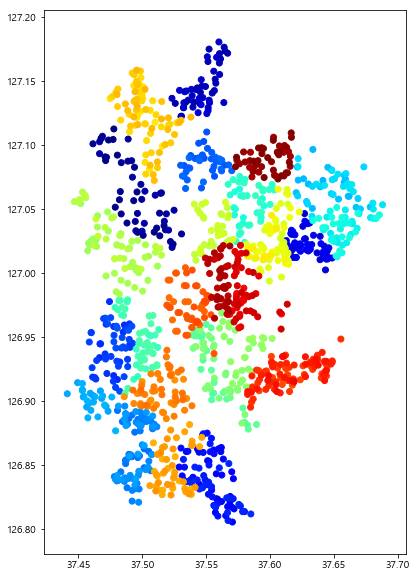

In [386]:

#Pointseoul color
# We can now plot our GeoDataFrame.
Pointseoul.plot(cmap='jet', figsize=(10,10))


# 집계구 서울 shp 작업하기

### 서울전체 집계구 작업은 시간이 많이 걸리니, 임의지역을 작게 선택해 작업합니다

In [387]:
# shp 등 4개 파일 모두 같이 복사합니다
cities_small = geopandas.read_file('zip_small.shp')
#'c:\Anaconda3\Souce\06-shp_plot\shp\zip_small.shp' 폴더포함 가능

In [388]:
cities_small.head()

,OBJECTID,BASE_YEAR,ADM_CD,TOT_REG_CD,SHAPE_LENG,SHAPE_AREA,geometry
0,92655,2016,1115066,1115066020901,790.779793,18628.137827,"POLYGON ((186242.9861737009 445419.5570926548,..."
1,90843,2016,1117072,1117072010001,695.237949,20453.850997,"POLYGON ((186478.543644158 444859.0215186802, ..."
2,90844,2016,1117072,1117072010003,518.086815,12176.737160,"POLYGON ((186596.0903559399 444841.679040661, ..."
3,90845,2016,1117072,1117072010002,458.501618,10729.716670,"POLYGON ((186432.6799556616 444983.0577860788,..."
4,90846,2016,1117072,1117072010005,865.257065,22811.555150,"POLYGON ((186340.8519047012 445038.0119188399,..."


In [389]:
cities_small.describe()

,OBJECTID,SHAPE_LENG,SHAPE_AREA
count,110.000000,110.000000,110.000000
mean,90814.372727,781.829041,27570.366716
std,426.678850,582.014558,47762.711248
min,90591.000000,262.914524,3213.852161
25%,90618.250000,431.874114,9351.949692
50%,90748.500000,617.957497,13951.082051
75%,90857.750000,848.695188,20508.955894
max,92706.000000,3556.557294,319826.054510


In [390]:
cities_small.crs

{'init': 'epsg:5181'}

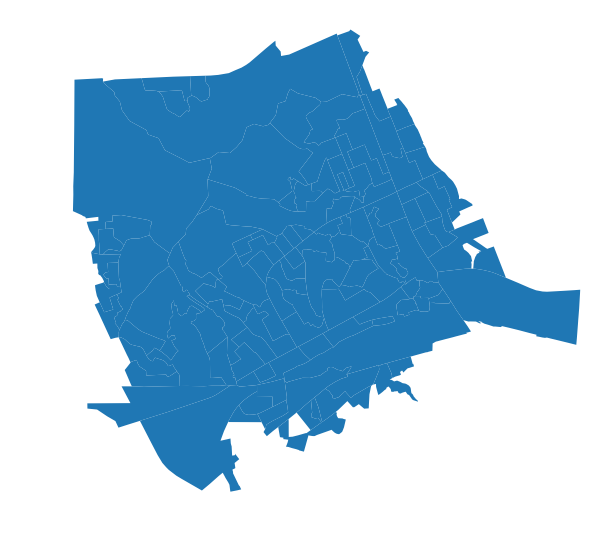

In [391]:
ax = cities_small.plot(figsize=(10,10))
ax.set_axis_off()

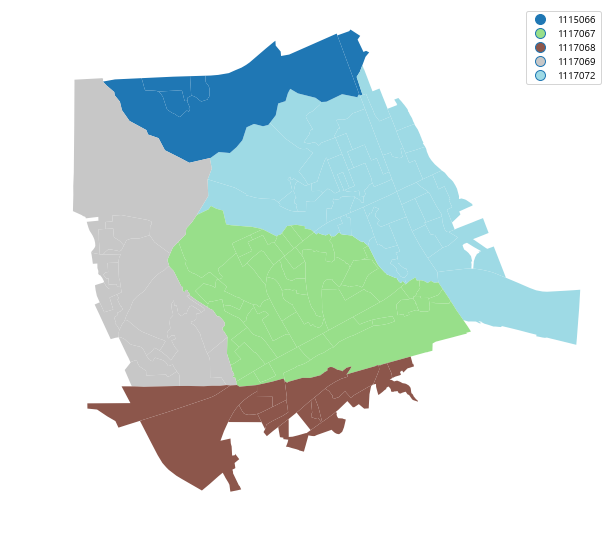

In [392]:
ax = cities_small.plot(column='ADM_CD', figsize=(10,10), legend=True, cmap='tab20')
ax.set_axis_off()